In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt; 
import matplotlib.animation as animation
%matplotlib inline 
from matplotlib import  rc
from IPython.display import HTML, Image

http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

In [13]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')


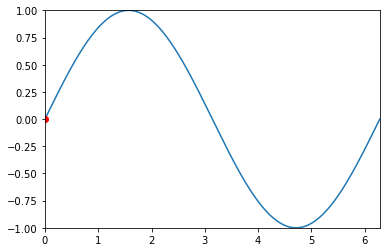

In [24]:

TWOPI = 2 * np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0, TWOPI, -1, 1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')


def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,


# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

# myAnimation

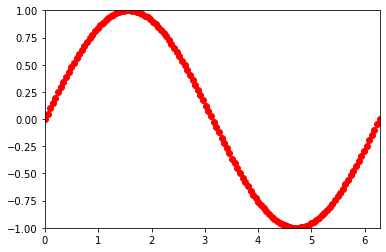

In [26]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
# ani.save('double_pendulum.mp4', writer=writer)
# plt.show()
ani

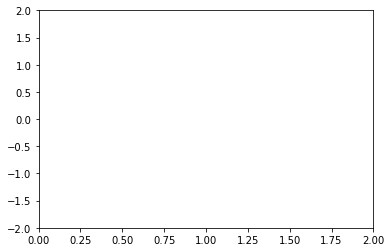

In [15]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [16]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [17]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [18]:
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [19]:
anim

In [28]:
anim.save('./Outputs/animation.gif', writer='imagemagick', fps=60)

In [29]:
Image(url='./Outputs/animation.gif')

In [2]:
import geopandas as gpd
